# Personality Type Classification

## Author: Spriha Ghosh

![alt](https://i.pinimg.com/originals/27/68/be/2768be0145ef24d34d16984852b91586.gif)

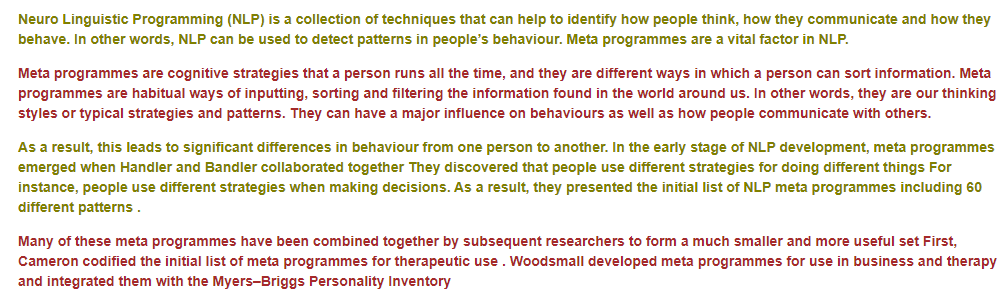



In [1]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
PW = 8
PH = 6
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 250
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import string 
import warnings


import os
print(os.listdir("../input"))

['mbti_1.csv']


In [2]:
df = pd.read_csv("../input/mbti_1.csv", encoding="utf-8")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB
None


In [3]:
print("Number of users", len(df))

Number of users 8675


In [10]:
df.tail(6)

,type,posts
8669,INFJ,"'I'm not sure about a method for picking out INFJ musical artists, but I have another name to throw into the cauldron: Jon Crosby, singer songwriter for VAST. Additionally, he strikes me as 4w5 on...|||ThatOneWeirdGuy Are you refering to the OP, the video I posted, or both? You didn't specify.|||Dario Nardi's EEG tests continuing to bear fruit: http://www.youtube.com/watch?v=YH9Zn7Glf3E&feature=player_embedded|||Arclight There's really no need for this argument to have started up as it..."
8670,ISFP,"'https://www.youtube.com/watch?v=t8edHB_h908|||IxFP just because I always think of cats as Fi doms for some reason. https://www.youtube.com/watch?v=ib28iGc9go4|||Especially on websites that have become a haven for neo nazis, such as PerC.|||I'm such a nerd. I've been learning Dutch on Duolingo and I'm having so much fun :)|||Duolingo is the shit! Oh my god I love this XD|||Right wingers do this because they lack political consciousness.|||I doubt it, but if they are real then I hope to he..."
8671,ENFP,"'So...if this thread already exists someplace else (which it does: http://personalitycafe.com/enfp-forum-inspirers/116902-movies-loved-enfp.html#post2952851), how the heck to I delete this one here???|||Ooops...I guess I didn't look too hard because I just started a Movies every ENFP should watch thread...|||So, this came up in the You Know You're An ENFP When... thread. (@Pucca : here we go! IT IS DONE :D) This isn't a list of films with ENFPs IN them, but rather ones that you believe E..."
8672,INTP,'So many questions when i do these things. I would take the purple pill. Pick winning lottery numbers. Do whatever I want.|||I worked in a brewery for a couple years here. I dont know if you're familiar with the local micros/craft at all but Mill st. was the name of it. Their tankhouse is my favorite of anything local.|||I am going to summon the great and powerful mr cafebot and his song of destruction. The four horseman ride. Count your days people of earth. Intro: Nick - the INTP male -...
8673,INFP,"'I am very conflicted right now when it comes to wanting children. I honestly had no maternal instinct whatsoever until recently. Up until now, none of my close friends have had children, and I...|||If I had to guess for my closest friends: 1. ISFJ 2. ESFP 3. ISTJ 4. xNFP 5. ESFJ I don't know if this is correct or not because I don't know if *they* know their types (actually the xNFP...|||What you said in the last paragraph ... as a teacher, this frustrates me too! There's a trend in ed..."
8674,INFP,"'It has been too long since I have been on personalitycafe - although it doesn't seem to have changed one bit - but I must say it is good to be back somewhere like this. Usually I turn to Doctor Who...|||http://www.youtube.com/watch?v=6EEW-9NDM5k|||Overwhelmed by the world around me.|||In one dream I have had I was being chased by a large shadowy creature, with someone else who I felt I had to save above all else. The dream ended after she reached safety, but as for what happened...|||Well n..."


In [5]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [7]:
df.dtypes

type     object
posts    object
dtype: object

In [8]:
df.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'lol, not bad hokahey. Now less speculation and more quirky conclusiveness. This place was getting boring, some one said!|||http://images.icanhascheezburger.com/completestore/2008/9/21/128665289828743124.jpg|||http://2.bp.blogspot.com/_Esz2h6sKmUU/R7oO09kWamI/AAAAAAAAAic/xCxauoBkQWs/s400/Carrey_Riddler.jpg|||*shakes head*...Dennis, I'm afraid actually..|||http://images-mediawiki-sites.thefullwiki.org/03/2/7/8/8063232287061272.png|||^ lol...thats cute.............becaauuse.............you......."
freq,1832,1


In [21]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], dtype=object)

In [24]:
total = df.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


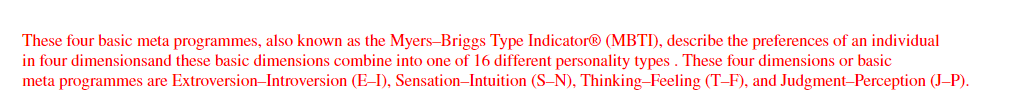
![alt](https://i.gifer.com/Gi1m.gif)

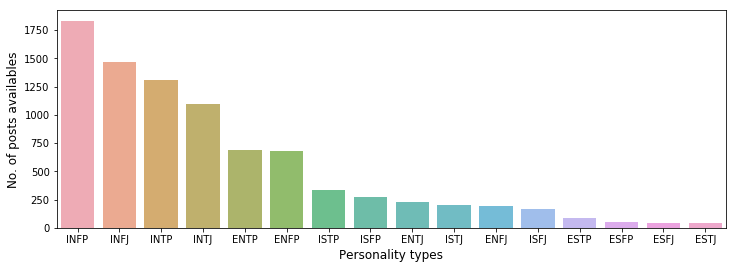

In [26]:
#Plotting this in descending order for better understanding of this visualization
cnt_srs = df['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

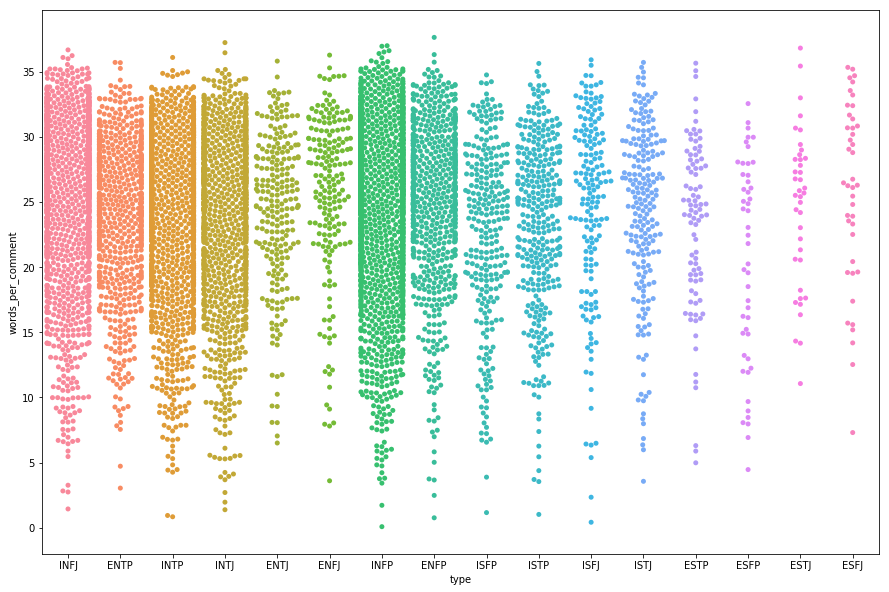

In [28]:
dfnew = df.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
dfnew['words_per_comment'] = dfnew['posts'].apply(lambda x: len(x.split())/50)
dfnew['variance_of_word_counts'] = dfnew['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=dfnew)

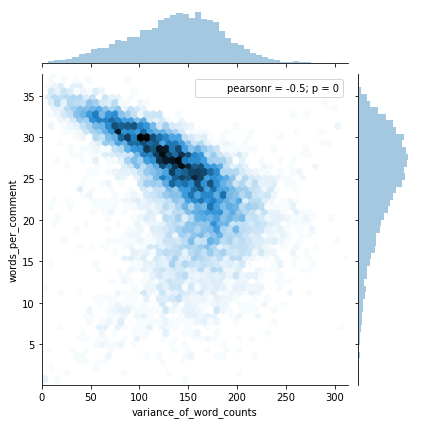

In [30]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=dfnew, kind="hex")

Text(0.5,1,'Distribution of Lengths of all 50 Posts')

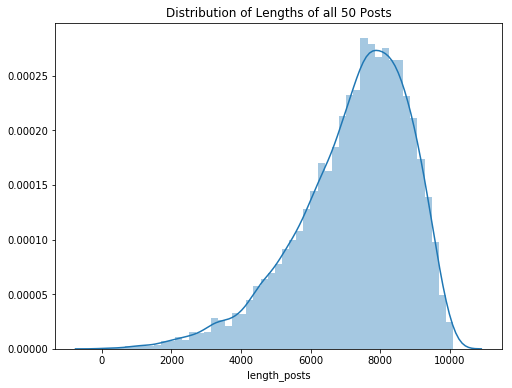

In [32]:
dfnew["length_posts"] = dfnew["posts"].apply(len)
sns.distplot(dfnew["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

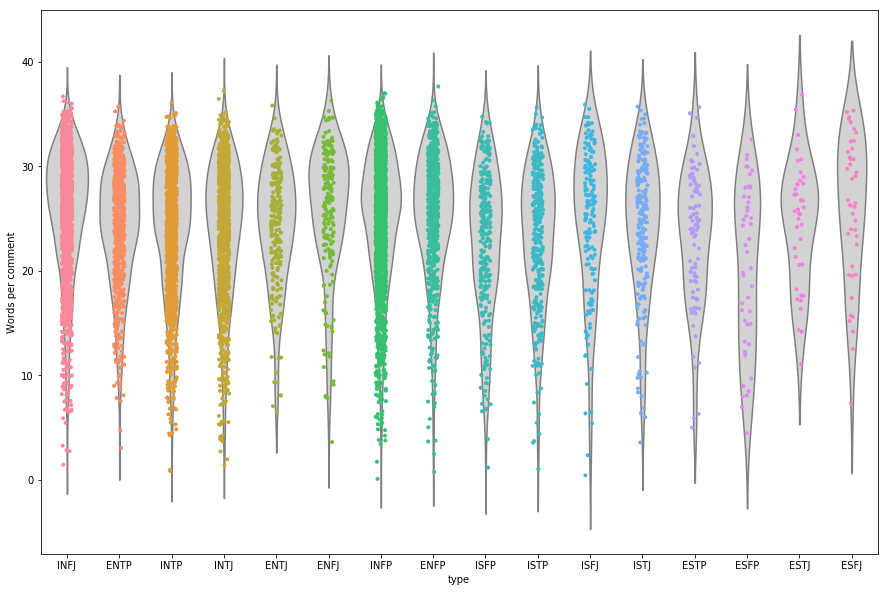

In [33]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=dfnew, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=dfnew, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

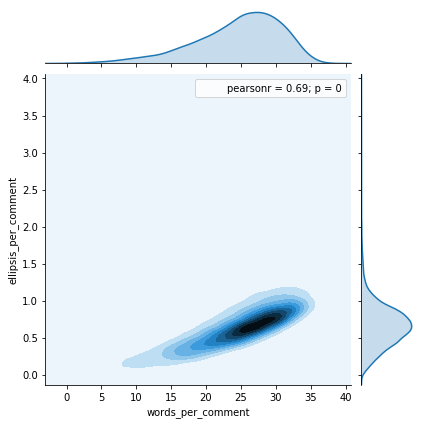

In [37]:
dfnew['http_per_comment'] = dfnew['posts'].apply(lambda x: x.count('http')/50)
dfnew['music_per_comment'] = dfnew['posts'].apply(lambda x: x.count('music')/50)
dfnew['question_per_comment'] = dfnew['posts'].apply(lambda x: x.count('?')/50)
dfnew['img_per_comment'] = dfnew['posts'].apply(lambda x: x.count('jpg')/50)
dfnew['excl_per_comment'] = dfnew['posts'].apply(lambda x: x.count('!')/50)
dfnew['ellipsis_per_comment'] = dfnew['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=dfnew, kind='kde')

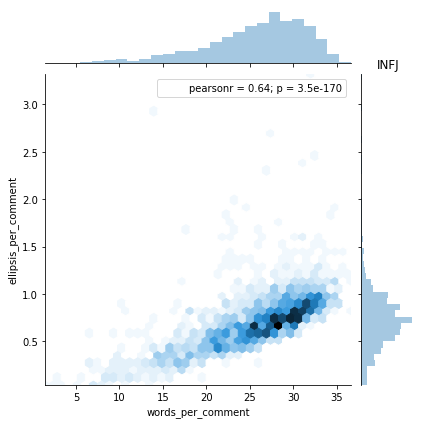

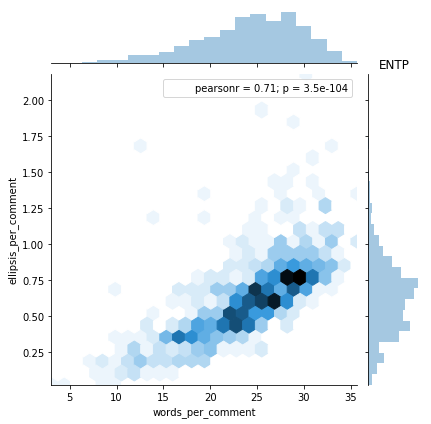

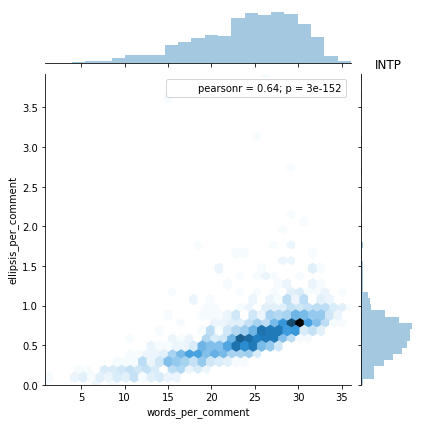

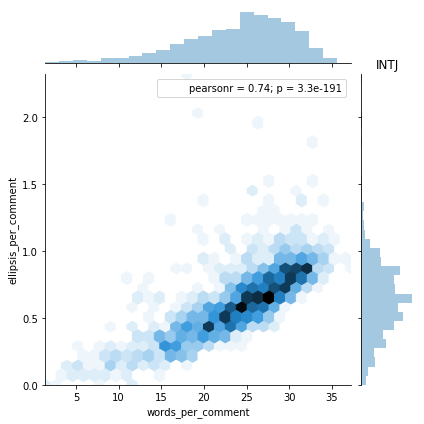

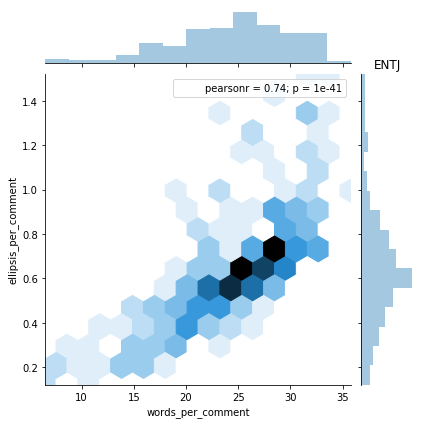

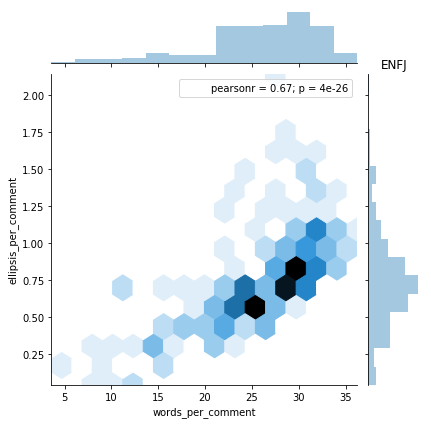

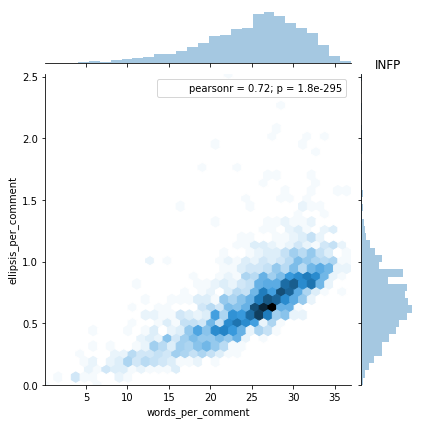

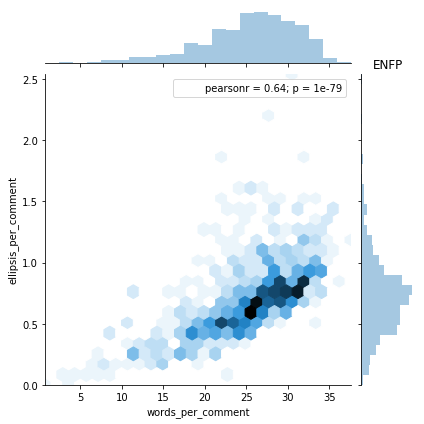

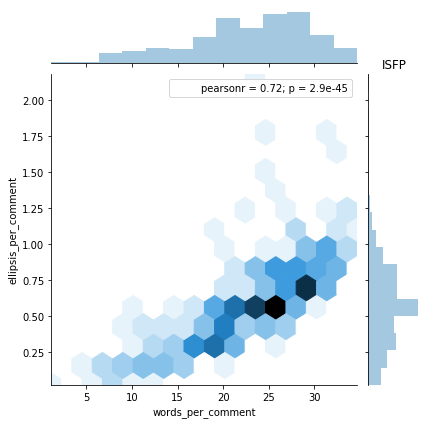

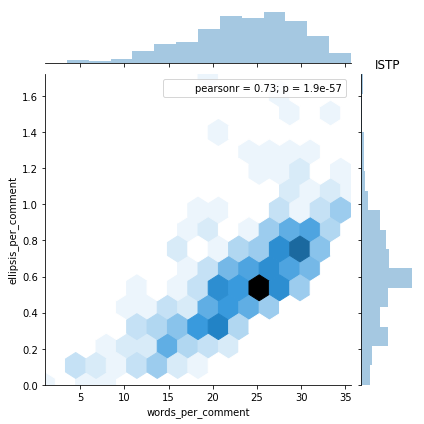

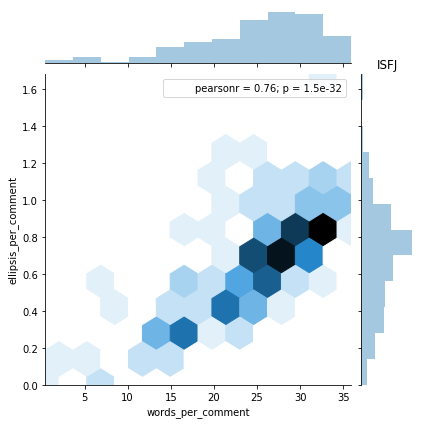

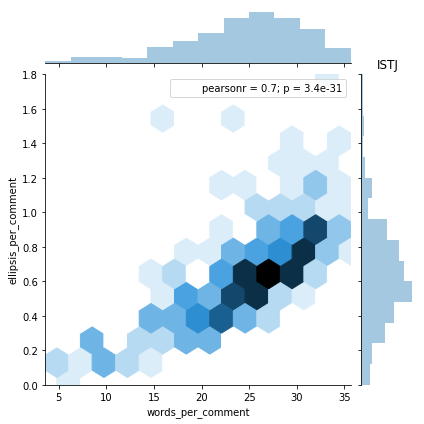

In [39]:
i = dfnew['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = dfnew[dfnew['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1

In [ ]:
df["LenPre"] = df["posts"].apply(len)
sns.distplot(df["LenPre"]).set_title("Distribution of Lengths of all 50 Posts");

# Natural Language Processing Toolkit (NLTK)
![ChessUrl](https://c.tenor.com/YZuyNz03KLQAAAAd/personality-looking-around.gif "chess")
![ChessUrl](https://gifs-as-documentation1.readthedocs.io/en/latest/_images/tumblr.gif "chess")

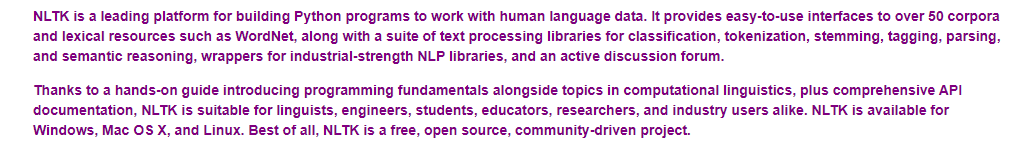

In [ ]:
def preprocess_text(df, remove_special=True):
    #Remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep EOS
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #To lower
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove short/long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove Personality Types Words
    #This is crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    df["posts"] = df["posts"].apply(lambda x: p.sub(' PTypeToken ',x))
    return df

#Used for class balancing. When class balancing is used dataset becomes very small.
def subsample(df):
    groups = df.groupby("type").count()
    groups.sort_values("posts", ascending=False, inplace=True)
    
    min_num = groups["posts"][-1]
    min_ind = groups.index[-1]
    ndf = df[df["type"] == min_ind]

    for pt in groups.index[:-1]:
        print(min_num,pt)
        tdf = df[df["type"] == pt].sample(min_num)
        ndf = pd.concat([ndf, tdf])
    return ndf

 ## Data Preprocessing
 
 ![alt](https://miro.medium.com/max/2000/1*zTkAXdkJZXKF6gy-QOtBYQ.gif)
 
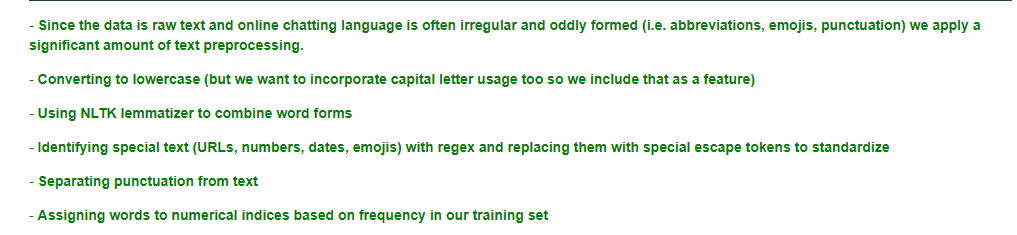

In [82]:
def preprocess_text(df, remove_special=True):
    #Remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep EOS
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))
    
      #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #To lower
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove short/long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove Personality Types Words
    #This is crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    df["posts"] = df["posts"].apply(lambda x: p.sub(' PTypeToken ',x))
    return df

#Used for class balancing. When class balancing is used dataset becomes very small.
def subsample(df):
    groups = df.groupby("type").count()
    groups.sort_values("posts", ascending=False, inplace=True)
    
    min_num = groups["posts"][-1]
    min_ind = groups.index[-1]
    ndf = df[df["type"] == min_ind]

    for pt in groups.index[:-1]:
        print(min_num,pt)
        tdf = df[df["type"] == pt].sample(min_num)
        ndf = pd.concat([ndf, tdf])
    return ndf
    

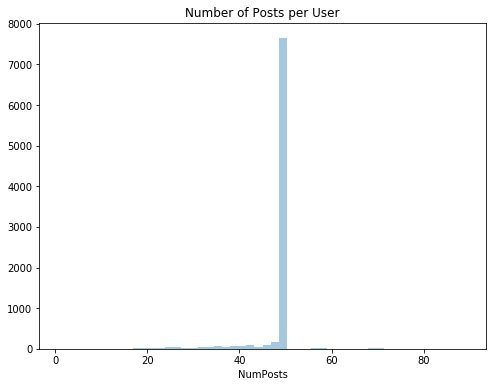

In [40]:
#Number of Posts per User
df["NumPosts"] = df["posts"].apply(lambda x: len(x.split("|||")))

sns.distplot(df["NumPosts"], kde=False).set_title("Number of Posts per User");

In [41]:
#Split to posts
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))

df = pd.DataFrame(posts, columns=["type", "posts"])

Number of users 8675
Number of posts 422845


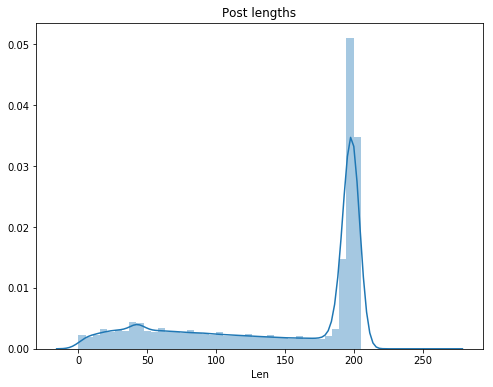

In [42]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [83]:
#Preprocess Text
df = preprocess_text(df) 

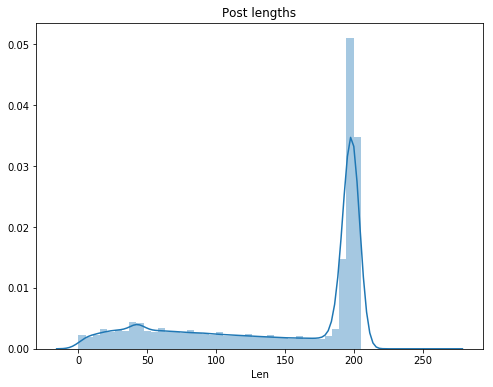

In [44]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [45]:
#Remove posts with less than X words
min_words = 15
print("Number of posts", len(df)) 
df["nw"] = df["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
df = df[df["nw"] >= min_words]
print("Number of posts", len(df)) 

Number of posts 422845
Number of posts 324407


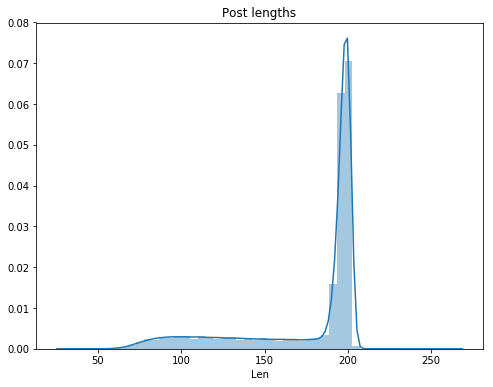

In [46]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [47]:
#Remove long post
max_length = 350
print("Number of posts", len(df)) 
df = df[df["Len"] < 350]
print("Number of posts", len(df)) 

Number of posts 324407
Number of posts 324407


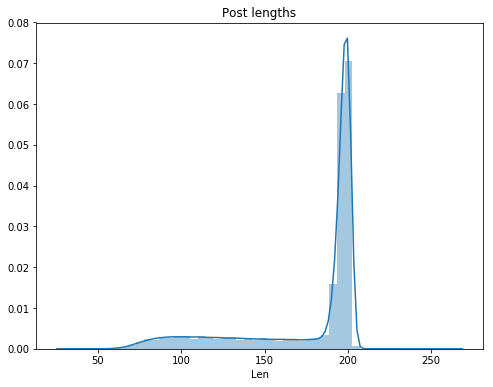

In [48]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [ ]:
#Drop nw Len
df.drop(["nw", "Len"],axis=1, inplace=True)

In [ ]:
#Subsample - Used for class balancing. 
#df = subsample(df)

## Word  Stemming

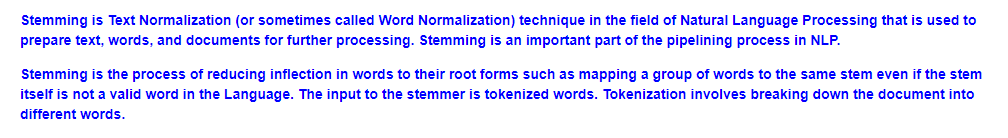

In [85]:
#Stem
stemmer = SnowballStemmer("english")

df["posts"] = df["posts"].apply(lambda x: " ".join(stemmer.stem(p) for p in x.split(" ")))

![ChessUrl](https://cdn.dribbble.com/users/1129235/screenshots/11391266/media/0175e6b4acb12abb416a3861a3526de3.gif "chess")

## Preprocessed Posts

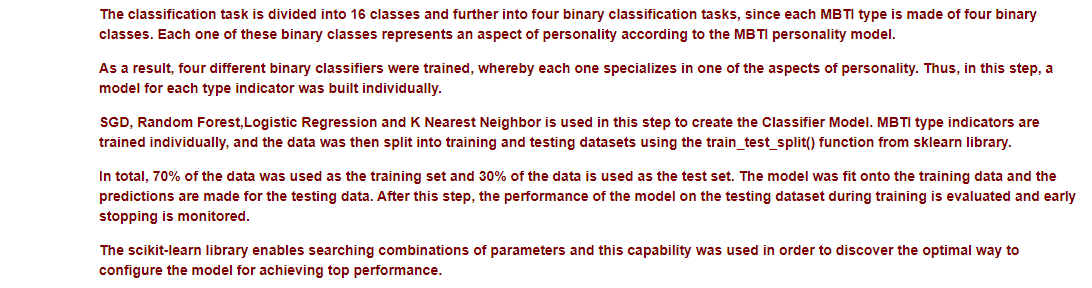

In [80]:
df.iloc[np.random.choice(len(df),10),:]

,type,posts,I-E,N-S,T-F,J-P
51614,ISFJ,"I read somewhere that ISFJ although normally won't lead because they like to support, but under certain circumstances if nobody lead, then they can step in and help out, be in charge, especially...",0,1,1,0
84132,INTP,"A chilly night but not so cold that it's uncomfortable. I'm by myself. I'm on a quiet street or on my back porch. That moment I look up towards the dark, clear skies ridden with tiny stars and just...",0,0,0,1
222019,INFJ,"They are condensing people down to their MBTI type. Inaccurately too, being as such a varied range of attributes and personal characteristics fall under people of each type, that in order to conclude...",0,0,1,0
418427,ISTJ,I definitely prefer to hang with the guys. They're calmer and easier to talk to and more fun to go do some activity with or something to that effect. I get nervous/tense/and I guard myself more...,0,1,0,0
269115,INFP,"I, too, have imagined a host of possible ways a situation- especially a stressful one might play itself out. And it distracts me from the task at hand.",0,0,1,1
130685,INTP,http://www.buzzfeed.com/kristinchirico/problems-all-people-who-hate-feelings-will-understand I find this quite accurate.,0,0,0,1
206899,INTP,"I am very upset that I don't have a Hamlet parody of the Fresh Prince rap, because I feel like that's a thing that I should already know about. But yeah, your username's super rad, so that's cool.",0,0,0,1
187388,INFP,"I've had issues with self-esteem and I certainly couldn't say that I can honor and love myself, no matter what other people think about me. My self-esteem has been very much tied to how other people...",0,0,1,1
248105,INFP,"I used to be very hating of the world and the vast majority of its inhabitants for their selfishness and lack of kindness. I wondered how anyone could be so cruel. But really, if the only people...",0,0,1,1
235494,INFJ,"'Thanks for this thread, @Pseudonymity has expressed the views that would most closely align with mine so far. I used to feel horrible about the problems of the world, and became depressed. But...",0,0,1,0


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier

## SGD Classifier


In [59]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print(yy.shape)
print(XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

sgdd = SGDClassifier(max_iter=5, tol=None)
sgdd.fit(XX_train, yy_train)
Y_predd = sgdd.predict(XX_test)
sgdd.score(XX_train, yy_train)
acc_sgdd = round(sgdd.score(XX_train, yy_train) * 100, 2)
print(round(acc_sgdd,2,), "%")

(324407,)
(324407, 3)
76.99 %


# **Random Forest**

In [64]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print(round(acc_random_forestt,2,), "%")

76.99 %


# Logistic Regression

In [65]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print(round(acc_logg,2,), "%")

76.99 %


# **K Nearest Neighbor**

In [66]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print(round(acc_knnn,2,), "%")

76.99 %


 ## Random Guessing Estimation

In [78]:
#Evaluating Acccuarcy across four categories indipendently 
def cat_accuracy(yp_test, y_test, le):
    ype = np.array(list("".join(le.inverse_transform(yp_test))))
    ye = np.array(list("".join(le.inverse_transform(y_test))))
    return (ype == ye).mean()

def predict_random_guess(priors, lp):
    return np.random.choice(priors.index, lp, p=priors.values)


In [79]:
num_iter = 100
mc16 = np.zeros(num_iter)
mc4 = np.zeros(num_iter)

warnings.filterwarnings(action='ignore', category=DeprecationWarning)
for i in range(100):
    mc16[i] = np.mean(le.transform(predict_random_guess(priors, len(y_test))) == y_test)
    mc4[i] = cat_accuracy(le.transform(predict_random_guess(priors, len(y_test))), y_test, le)


print ("Random Guessing 16 Types:", mc16.mean(), mc16.std())
print ("Random Guessing 4 Categories:", mc4.mean(), mc4.std())

Random Guessing 16 Types: 0.129534539626 0.00170283359652
Random Guessing 4 Categories: 0.609002573903 0.00129692244317


## Constraints and Limitations

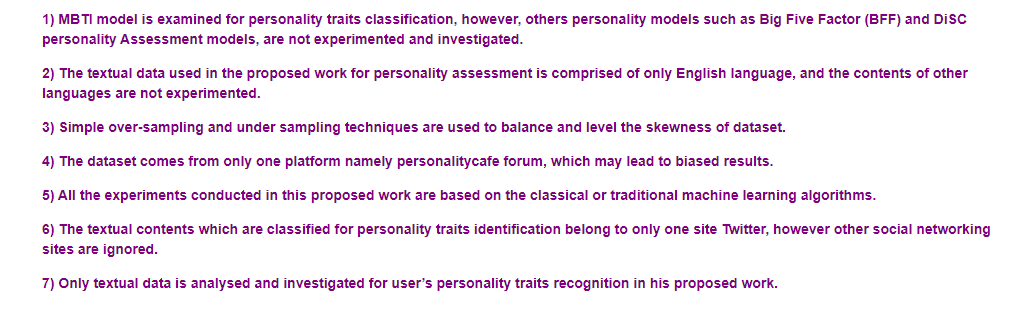

## Conclusion and Further Steps

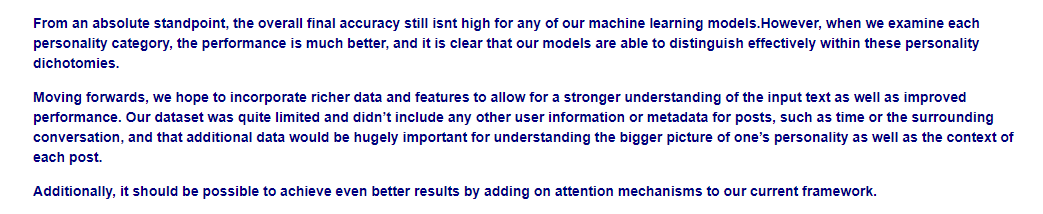